In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report



In [2]:
# DATA EXPLORATION

In [3]:
# Loading the Dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
 df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Check the entries with NaN vales.
df.loc[df['Embarked'].isna(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We see both passengers share the variable values, Sex = female, Pclass = 1, they were in the same Cabin = B28, and the Ticket number is the same Ticket = 113572. Do you think it is a coincidence? I think Not. Mrs. Stone boarded the Titanic in Southampton on 10 April 1912 and was traveling in first class with her maid Amelie Icard. She occupied cabin B-28
https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [8]:
# CLEAN DATA
# Drop Cabin Column due to a lot of missing data
df.drop('Cabin',axis=1,inplace=True)
# Fill Age null values with average
df['Age'].fillna(df['Age'].mean(),inplace=True)
#Fill null Embarked values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13648\1990862906.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13648\1990862906.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# VISUALISE THE DATASET
# How many survived versus those who  died
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Count')

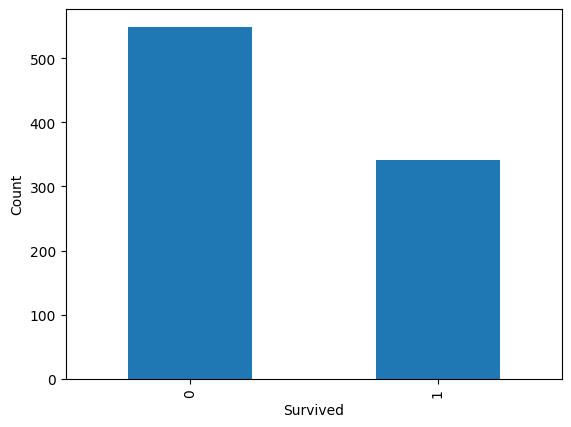

In [11]:
# plotting bar graph label the x axis and y
df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')

Text(0.5, 1.0, 'Pclass vs Survived')

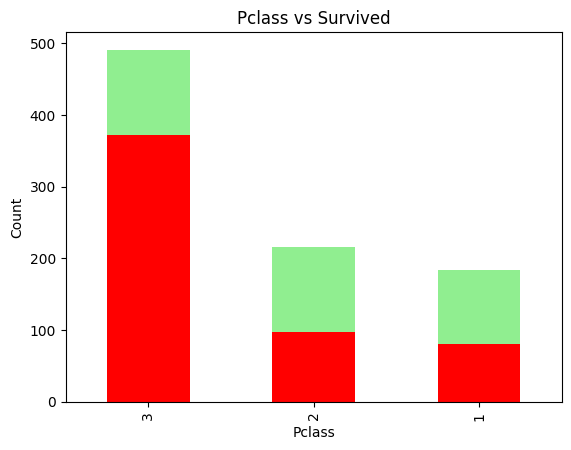

In [12]:
df['Pclass'].value_counts().plot(kind='bar',color='lightgreen')
df[df['Survived']==0]['Pclass'].value_counts().plot(kind='bar',color='red')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass vs Survived')

Text(0.5, 1.0, 'AGE distribution vs Survived')

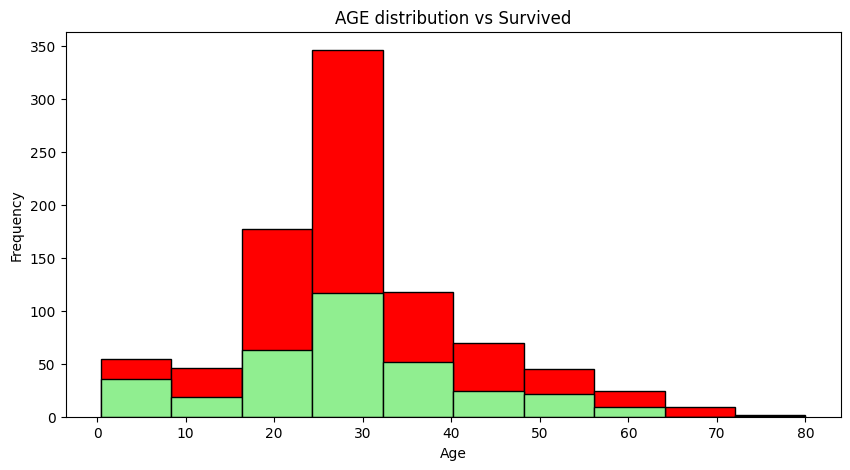

In [13]:
# Age distribution
df['Age'].plot(kind='hist', figsize=(10, 5), color='red', edgecolor='black')
df[df['Survived']==1]['Age'].plot(kind='hist', figsize=(10, 5), color='lightgreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.title('AGE distribution vs Survived')

In [14]:
n_alone , n_duplicates = df['Ticket'].duplicated(keep=False).astype(int).value_counts()
print("Number of duplicated ticket values:", n_duplicates)
print("Number of non-duplicated ticket values:", n_alone)

Number of duplicated ticket values: 344
Number of non-duplicated ticket values: 547


In [15]:
df['Companions'] = df['Ticket'].duplicated(keep=False).astype(int) * df.groupby('Ticket')['Ticket'].transform('count') -1
df.loc[df['Companions'] == -1, 'Companions'] = 0

In [16]:
df['Companions'].value_counts()

Companions
0    547
1    188
2     63
3     44
6     21
5     18
4     10
Name: count, dtype: int64

In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch']
print(df[['SibSp','Parch','FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by = 'Survived'))

   FamilySize     SibSp     Parch  Survived
7           7  4.333333  2.666667  0.000000
8          10  8.000000  2.000000  0.000000
5           5  2.818182  2.181818  0.136364
4           4  2.133333  1.866667  0.200000
0           0  0.000000  0.000000  0.303538
6           6  3.250000  2.750000  0.333333
1           1  0.763975  0.236025  0.552795
2           2  0.872549  1.127451  0.578431
3           3  1.344828  1.655172  0.724138


In [18]:
import re
# get the 'Title'
def get_title(name):
 title_search = re.search(' ([A-Za-z]+)\.', name)
 # If the title exists, extract and return it.
 if title_search:
  return title_search.group(1)
 return ""

df['Title'] = df['Name'].apply(get_title)

df_grouped = df.groupby(['Title', 'Sex']).agg({'Survived': ['sum', lambda x: x.count() - x.sum()]})
df_grouped.columns = ['Survived', 'Non-Survived']
df_grouped['Count'] = df.groupby(['Title', 'Sex']).size()
print(df_grouped)

                 Survived  Non-Survived  Count
Title    Sex                                  
Capt     male           0             1      1
Col      male           1             1      2
Countess female         1             0      1
Don      male           0             1      1
Dr       female         1             0      1
         male           2             4      6
Jonkheer male           0             1      1
Lady     female         1             0      1
Major    male           1             1      2
Master   male          23            17     40
Miss     female       127            55    182
Mlle     female         2             0      2
Mme      female         1             0      1
Mr       male          81           436    517
Mrs      female        99            26    125
Ms       female         1             0      1
Rev      male           0             6      6
Sir      male           1             0      1


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\User\AppData\Local\Temp\ipykernel_13648\686118462.py:4: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


In [19]:
# Clean the variable Title.
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
  'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'noble')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Mrs')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [20]:
# Check the survival rate for the title cathegories obtained
df_grouped = df.groupby(['Title', 'Sex']).agg({'Survived': ['sum', lambda x: x.count() - x.sum()]})
df_grouped.columns = ['Survived', 'Non-Survived']
df_grouped['Count'] = df.groupby(['Title', 'Sex']).size()
# Calculate the survived/non-survived rate
df_grouped['Survival Rate'] = df_grouped['Survived'] / (df_grouped['Survived'] + df_grouped['Non-Survived'])
# Order the DataFrame by the survival rate in descending order
df_grouped = df_grouped.sort_values('Survival Rate', ascending=False)

print(df_grouped)

               Survived  Non-Survived  Count  Survival Rate
Title  Sex                                                 
noble  female         3             0      3       1.000000
Mrs    female       101            26    127       0.795276
Miss   female       129            55    184       0.701087
Master male          23            17     40       0.575000
noble  male           5            15     20       0.250000
Mr     male          81           436    517       0.156673


We can see that being a noble made a very difference in the Titanic's survival probability. The other titles reflect the sex and age of the passenger. We can observe that the survival rate for a man with the title master is better than those with the title Mr., although, it can be interpreted by age whereas younger man has a better chance to survive. If we compare the survival rate of women, the passengers with the title Miss. have a lower survival chance when compared to the women with the title Mrs. whereas it can indicate the status of the woman as married or not can make a difference. But we all agree that the information about the family and the age has its own features to describe. The exclusive information we can obtain from the title feature is if the passenger owns a noble title or not.

df['noble'] = df['Title'].apply(lambda x: 1  i

In [21]:
  # Change the categorical data into numeric these include Embarked,Sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['Sex'] = le.fit_transform(df['Sex'])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Companions,FamilySize,Title,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1,Mr,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1,Mrs,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,Miss,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,1,Mrs,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,Mr,False,True


In [22]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X=df[features]
y=df['Survived']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [26]:
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7988826815642458
[[92 18]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [27]:
# The dataset is imbalanced leading to a model that can predict very well data of Unsurvived victims
# Using Smote for balancing the dataset
from imblearn.over_sampling import SMOTE

# Applying smote to the train data
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
# Standardize the features
scaler=StandardScaler()
X_train_smote=scaler.fit_transform(X_train_smote)
X_test=scaler.transform(X_test)

logreg=LogisticRegression()
logreg.fit(X_train_smote,y_train_smote)
y_pred_logreg=logreg.predict(X_test)

# print the classification report
print(classification_report(y_test,y_pred_logreg))

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Using Decision Trees


In [28]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
y_pred_tree=tree.predict(X_test)


# Evaluate the model
print('Decision Tree Classifier')
print(classification_report(y_test,y_pred_tree ))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [29]:
# Using Gradient Boosing
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)

# Evaluate the model
print('Gradient Boosting Classifier')
print(classification_report(y_test,y_pred_gb))

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       110
           1       0.87      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



In [30]:
from sklearn.svm import SVC

# Train the SVM model
svm=SVC(probability=True,random_state=42)
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

# Evaluate the model
print('Support VectoR Machine')
print(classification_report(y_test,y_pred))

Support VectoR Machine
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-NN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate model
print("k-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [32]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluate model
print("Neural Network (MLP):")
print(classification_report(y_test, y_pred_mlp))

Neural Network (MLP):
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       110
           1       0.88      0.62      0.73        69

    accuracy                           0.82       179
   macro avg       0.84      0.78      0.80       179
weighted avg       0.83      0.82      0.81       179



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


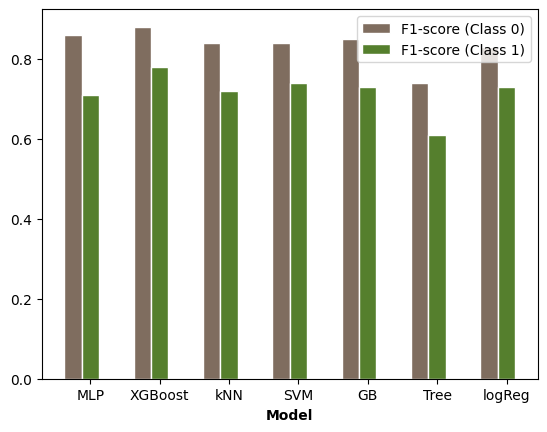

In [ ]:

# Model names
models = ['MLP', 'XGBoost', 'kNN','SVM','GB','Tree','logReg']

# Metrics for each model (class 0)
precision_0 = [0.79, 0.84, 0.81,0.84,0.81,0.75,0.83]
recall_0 = [0.95, 0.93, 0.87,0.84,0.90,0.73,0.83]
f1_score_0 = [0.86, 0.88, 0.84,0.84,0.85,0.74,0.83]

# Metrics for each model (class 1)
precision_1 = [0.89, 0.86, 0.77,0.74,0.81,0.59,0.73]
recall_1 = [0.59, 0.71, 0.68,0.74,0.67,0.62,0.74]
f1_score_1 = [0.71, 0.78, 0.72,0.74,0.73,0.61,0.73]

# Set width of bars
barWidth = 0.25

# Set position of bars on X axis
r1 = np.arange(len(precision_0))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, f1_score_0, color='#7f6d5f', width=barWidth, edgecolor='white', label='F1-score (Class 0)')
plt.bar(r2, f1_score_1, color='#557f2d', width=barWidth, edgecolor='white', label='F1-score (Class 1)')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision_0))], models)

# Create legend & Show graphic
plt.legend()
plt.show()